In [ ]:
import pandas as pd

### Download Coco schema and do basic analysis

In [ ]:
url = "https://raw.githubusercontent.com/amitkml/Transformer-DeepLearning/main/Session-10-ObjectLocalisation/COCO%20object%20detection/sample_coco.txt"
df_coco_schema = pd.read_csv(url,
                             header = None,
                             names = ['id','height','width','bb_dim_left_x',
                                      'bb_dim_left_y','bb_dim_width','bb_dim_height','Obsolete'],
                             )
df_coco_schema.head()

,id,height,width,bb_dim_left_x,bb_dim_left_y,bb_dim_width,bb_dim_height,Obsolete
0,id: 0,height: 330,width: 1093,bbox:[69,464,312,175],NaN
1,id: 1,height: 782,width: 439,bbox:[359,292,83,199],NaN
2,id: 3,height: 645,width: 831,bbox:[297,312,267,167],NaN
3,id: 34,height: 943,width: 608,bbox:[275,112,319,290],NaN
4,id: 20,height: 593,width: 857,bbox:[71,368,146,147],NaN


In [ ]:
## do basic data cleaning and removing unwanted columns. Then converted all the columns into numeric
df_coco_schema['id'] = df_coco_schema['id'].str.replace(r'id: ', '')
df_coco_schema['height'] = df_coco_schema['height'].str.replace(r'height: ', '')
df_coco_schema['width'] = df_coco_schema['width'].str.replace(r'width: ', '')
df_coco_schema['bb_dim_left_x'] = df_coco_schema['bb_dim_left_x'].str.replace(r'bbox:\[', '')
df_coco_schema['bb_dim_height'] = df_coco_schema['bb_dim_height'].str.replace(r'\]', '')
df_coco_schema.drop('Obsolete', axis=1, inplace=True)
# convert all columns of DataFrame
df_coco_schema = df_coco_schema.apply(pd.to_numeric) # convert all columns of DataFrame

In [ ]:
df_coco_schema.head()

,id,height,width,bb_dim_left_x,bb_dim_left_y,bb_dim_width,bb_dim_height
0,0,330,1093,69,464,312,175
1,1,782,439,359,292,83,199
2,3,645,831,297,312,267,167
3,34,943,608,275,112,319,290
4,20,593,857,71,368,146,147


In [ ]:
maxClm = df_coco_schema['id'].max()
maxClm

79

In [ ]:
## get the coco dataset annotation file as we need to map class id with name
url = "https://gist.githubusercontent.com/AruniRC/7b3dadd004da04c80198557db5da4bda/raw/2f10965ace1e36c4a9dca76ead19b744f5eb7e88/ms_coco_classnames.txt"
df_coco_schema_class_name = pd.read_csv(url,
                                        sep = ':',
                                        header = None,
                                        names = ['id','class_name'],
                            
                             )
df_coco_schema_class_name['id'] = df_coco_schema_class_name['id'].str.replace(r'{', '')
df_coco_schema_class_name['class_name'] = df_coco_schema_class_name['class_name'].str.replace(r'u\'', '')
df_coco_schema_class_name['class_name'] = df_coco_schema_class_name['class_name'].str.replace(r'\',', '')
df_coco_schema_class_name['class_name'] = df_coco_schema_class_name['class_name'].str.replace(r'__', '')
df_coco_schema_class_name["id"] = pd.to_numeric(df_coco_schema_class_name["id"])
df_coco_schema_class_name.head()

,id,class_name
0,0,background
1,1,person
2,2,bicycle
3,3,car
4,4,motorcycle


In [ ]:
# df_coco_class_annot_details = pd.merge(df_coco_schema, df_coco_schema_class_name, on=df_coco_schema.id, how='outer')
df_coco_class_annot_details = pd.merge(df_coco_schema, df_coco_schema_class_name, left_on='id', right_on='id')

df_coco_class_annot_details.head()

,id,height,width,bb_dim_left_x,bb_dim_left_y,bb_dim_width,bb_dim_height,class_name
0,0,330,1093,69,464,312,175,background
1,0,645,326,242,12,96,346,background
2,0,496,768,106,174,366,47,background
3,0,784,780,197,244,340,347,background
4,0,783,702,446,193,205,184,background


In [ ]:
maxClm = df_coco_class_annot_details['class_name'].unique()
maxClm

array([' background', ' person', ' car', ' kite', ' cow', ' dining table',
       ' cat', ' wine glass', ' clock', ' stop sign', ' airplane', ' dog',
       ' bed', ' tennis racket', ' cup', ' pizza', ' oven', ' remote',
       ' bench', ' tie', ' traffic light', ' laptop', ' bottle',
       ' surfboard', ' bird', ' baseball bat', ' bus', ' broccoli',
       ' bowl', ' truck', ' toaster', ' snowboard', ' book', ' vase',
       ' spoon', ' mouse', ' teddy bear', ' fork', ' cake', ' keyboard',
       ' chair', ' motorcycle', ' fire hydrant', ' skis', ' bicycle',
       ' couch', ' parking meter', ' microwave', ' horse', ' sandwich',
       ' frisbee', ' baseball glove', ' sports ball', ' carrot',
       ' cell phone', ' refrigerator', ' sheep', ' apple', ' toilet',
       ' umbrella', ' bear', ' hot dog', ' zebra', ' orange', ' boat',
       ' sink', ' tv', ' handbag', ' train', ' suitcase', ' hair drier',
       ' elephant', ' donut', ' backpack', ' potted plant', ' skateboard',
       

## Class Distrbution

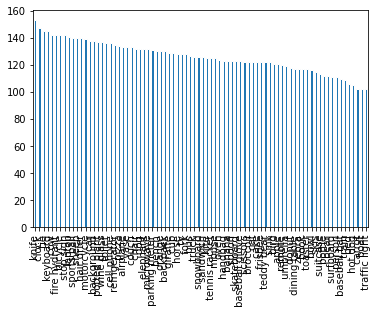

In [ ]:
df_coco_class_annot_details.class_name.value_counts().plot(kind='bar',edgecolor='white', linewidth=1)

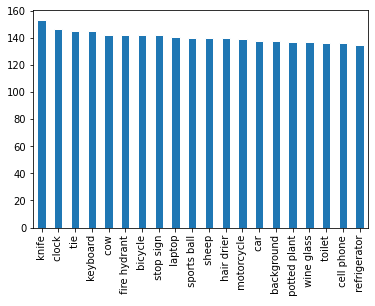

In [ ]:
## top 20 class count
df_coco_class_annot_details.class_name.value_counts().nlargest(20).plot(kind='bar',edgecolor='white', linewidth=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f537f2b8890>]],
      dtype=object)

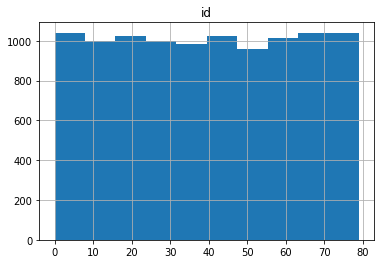

In [ ]:
df_coco_class_annot_details.hist(column="id")

## Prepare data for K-Means Clustering


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#Normalize the Box Dimensions based on Image Height and Width
df_coco_class_annot_details['bb_dim_left_x'] = df_coco_class_annot_details['bb_dim_left_x'] / df_coco_class_annot_details['width']
df_coco_class_annot_details['bb_dim_left_y'] = df_coco_class_annot_details['bb_dim_left_y'] / df_coco_class_annot_details['height']
df_coco_class_annot_details['bb_dim_width'] = df_coco_class_annot_details['bb_dim_width'] / df_coco_class_annot_details['width']
df_coco_class_annot_details['bb_dim_height'] = df_coco_class_annot_details['bb_dim_height'] / df_coco_class_annot_details['height']

In [ ]:
df_coco_class_annot_details.head()

,id,height,width,bb_dim_left_x,bb_dim_left_y,bb_dim_width,bb_dim_height,class_name
0,0,330,1093,0.063129,1.406061,0.285453,0.530303,background
1,0,645,326,0.742331,0.018605,0.294479,0.536434,background
2,0,496,768,0.138021,0.350806,0.476562,0.094758,background
3,0,784,780,0.252564,0.311224,0.435897,0.442602,background
4,0,783,702,0.635328,0.246488,0.292023,0.234994,background


In [ ]:
df_coco_class_annot_details = df_coco_class_annot_details.dropna()

### Plot height and width of data points


In [ ]:
import json
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import shutil
import random 
import math
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

In [ ]:
hw_array = df_coco_class_annot_details[["bb_dim_width", "bb_dim_height"]].to_numpy()
hw_array.shape

(10105, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


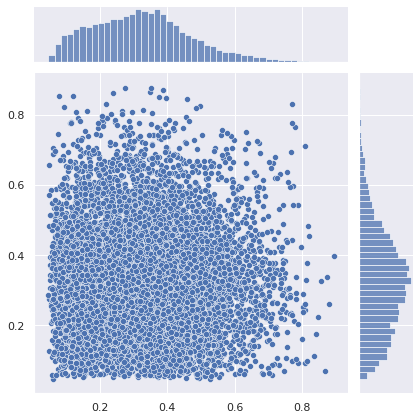

In [ ]:
sns.jointplot(hw_array[:,0], hw_array[:,1])


## K-Means clustering

In [ ]:
wccs = []
kmeans={}
cluster_range = range(2, 15)
for n_clusters in cluster_range:
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(hw_array)
  wccs.append(kmeans.inertia_)

**WCSS Plot**
- An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

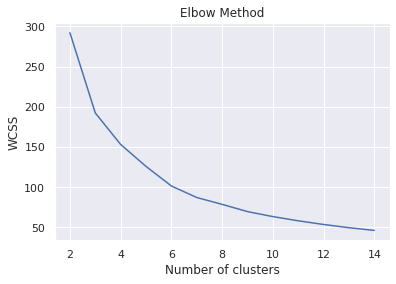

In [ ]:
plt.plot(cluster_range, wccs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### So, we have selected K =3 which is where we can see elbow

## Cluster of Centroid and Anchor Box Size and its Plotting

In [ ]:
# Cluster Plot and Anchor box for k=3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(hw_array)
print(" The Centroid of the Anchor Boxes for " , n_clusters , " clusters")
print(kmeans.cluster_centers_)

 The Centroid of the Anchor Boxes for  3  clusters
[[0.27682634 0.48206357]
 [0.23122325 0.22683049]
 [0.48809269 0.29155763]]


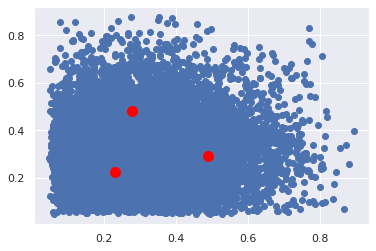

In [ ]:
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

In [ ]:
# https://github.com/joydeepmedhi/Anchor-Boxes-with-KMeans/blob/master/EDA%20of%20bbox.ipynb

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

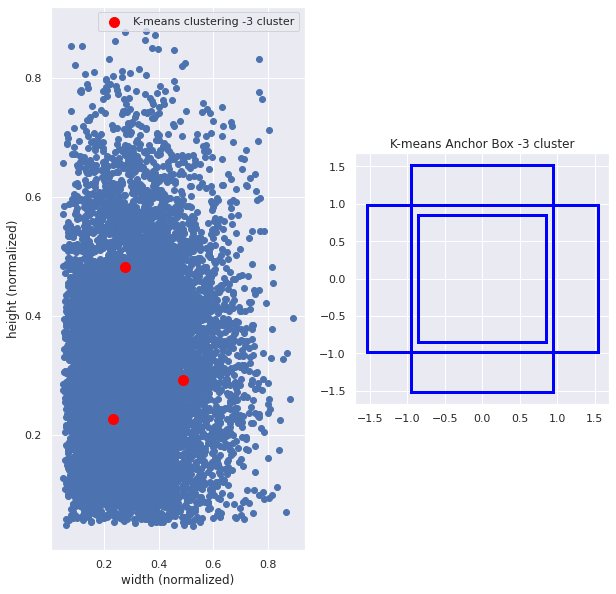

In [43]:
## 
fig, axs = plt.subplots(1,2, figsize = (10,10))
axs[0].scatter(hw_array[:,0], hw_array[:,1])
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label="K-means clustering -3 cluster")

axs[0].set_xlabel("width (normalized)")
axs[0].set_ylabel("height (normalized)")
axs[0].legend(loc="upper right")

axs[1].plot([0,0],[0,0])

anchor_boxes_dims = np.power(10,kmeans.cluster_centers_)

for x, y in anchor_boxes_dims:
  px = -x/2
  py = -y/2
  ht = y
  wd= x
  axs[1].add_patch(Rectangle((px, py), wd, ht, fill = False, color = 'blue', lw =3))
  axs[1].set_aspect('equal','box')

plt.title("K-means Anchor Box -3 cluster")
plt.savefig("Anchor_boxes.jpg",bbox_inches='tight')

 The Centroid of the Anchor Boxes for  5  clusters
[[0.36634338 0.52759436]
 [0.18989988 0.18527578]
 [0.5828869  0.32281949]
 [0.19597739 0.39932208]
 [0.38396119 0.23783284]]


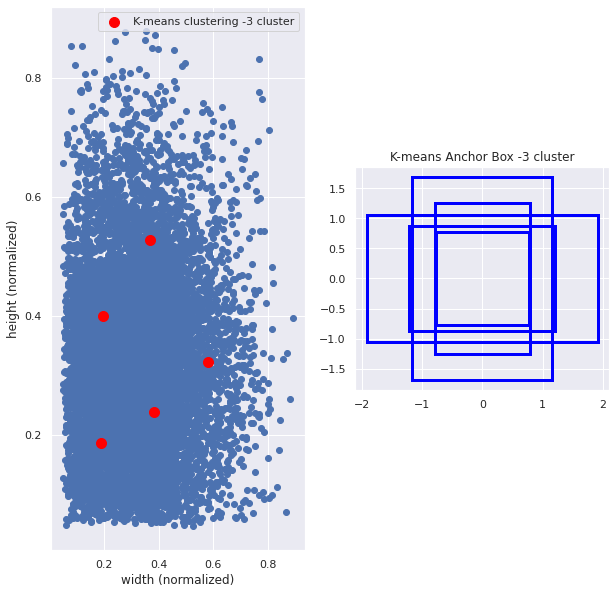

In [44]:
## lets plot anchor box for 5

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(hw_array)
print(" The Centroid of the Anchor Boxes for " , n_clusters , " clusters")
print(kmeans.cluster_centers_)


fig, axs = plt.subplots(1,2, figsize = (10,10))
axs[0].scatter(hw_array[:,0], hw_array[:,1])
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label="K-means clustering -3 cluster")

axs[0].set_xlabel("width (normalized)")
axs[0].set_ylabel("height (normalized)")
axs[0].legend(loc="upper right")

axs[1].plot([0,0],[0,0])

anchor_boxes_dims = np.power(10,kmeans.cluster_centers_)

for x, y in anchor_boxes_dims:
  px = -x/2
  py = -y/2
  ht = y
  wd= x
  axs[1].add_patch(Rectangle((px, py), wd, ht, fill = False, color = 'blue', lw =3))
  axs[1].set_aspect('equal','box')

plt.title("K-means Anchor Box -3 cluster")
plt.savefig("Anchor_boxes.jpg",bbox_inches='tight')